Dataset can be downloaded from this link :
https://www.kaggle.com/alxmamaev/flowers-recognition/download

**Importing all the modules**

In [1]:
import os
import cv2
import numpy as np

# For Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#for Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#For Plotting Images
import matplotlib.pyplot as plt



In [2]:
#Dataset directory path captured prior
folder_dir = '/content/drive/MyDrive/flowers'

In [6]:
os.listdir(folder_dir)
#os.listdir(folder_dir/sunflower)

['sunflower', 'rose', 'dandelion', 'tulip', 'daisy']

**Extracting files and maintaining the label data**

In [7]:
data = []
label = []
SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
  for file in os.listdir(os.path.join(folder_dir,folder)):
    if file.endswith("jpg"):
      label.append(folder)
      img = cv2.imread(os.path.join(folder_dir,folder,file))
      img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      im = cv2.resize(img_rgb, (SIZE,SIZE))
      data.append(im)
    else:
      continue

**Converting the images and lable to array data types**

In [10]:
data_arr = np.array(data)
label_arr = np.array(label)


**Using the label encoder and normalizing the data**

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)

In [27]:
y = to_categorical(y,5)
x = data_arr/255

**Splitting the data into train and test sets**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

**Building the neural network using convolutional layers**

In [33]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation='softmax'))

**Before compiling the model we need to create more training images to prevent overfitting**

In [34]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

**Now let's compile the model**

In [35]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['Accuracy'])
batch_size = 32
epochs = 64

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
108/108 [==============================] - 53s 208ms/step - loss: 1.5624 - Accuracy: 0.3142 - val_loss: 1.4124 - val_Accuracy: 0.3889
Epoch 2/64
108/108 [==============================] - 21s 190ms/step - loss: 1.3681 - Accuracy: 0.3889 - val_loss: 1.3368 - val_Accuracy: 0.4340
Epoch 3/64
108/108 [==============================] - 20s 185ms/step - loss: 1.3090 - Accuracy: 0.4214 - val_loss: 1.3323 - val_Accuracy: 0.4271
Epoch 4/64
108/108 [==============================] - 20s 185ms/step - loss: 1.2066 - Accuracy: 0.4694 - val_loss: 1.1651 - val_Accuracy: 0.5093
Epoch 5/64
108/108 [==============================] - 21s 189ms/step - loss: 1.1877 - Accuracy: 0.4999 - val_loss: 1.2191 - val_Accuracy: 0.4907
Epoch 6/64
108/108 [==============================] - 21s 189ms/step - loss: 1.1314 - Accuracy: 0.5140 - val_loss: 1.1841 - val_Accuracy: 0.5127
Epoch 7/64
108/108 [==============================] - 21s 190ms/step - loss: 1.1203 - Accuracy: 0.5262 - val_loss: 1.2531 - val_Ac

**Testing the model and plotting the true and predicted label**

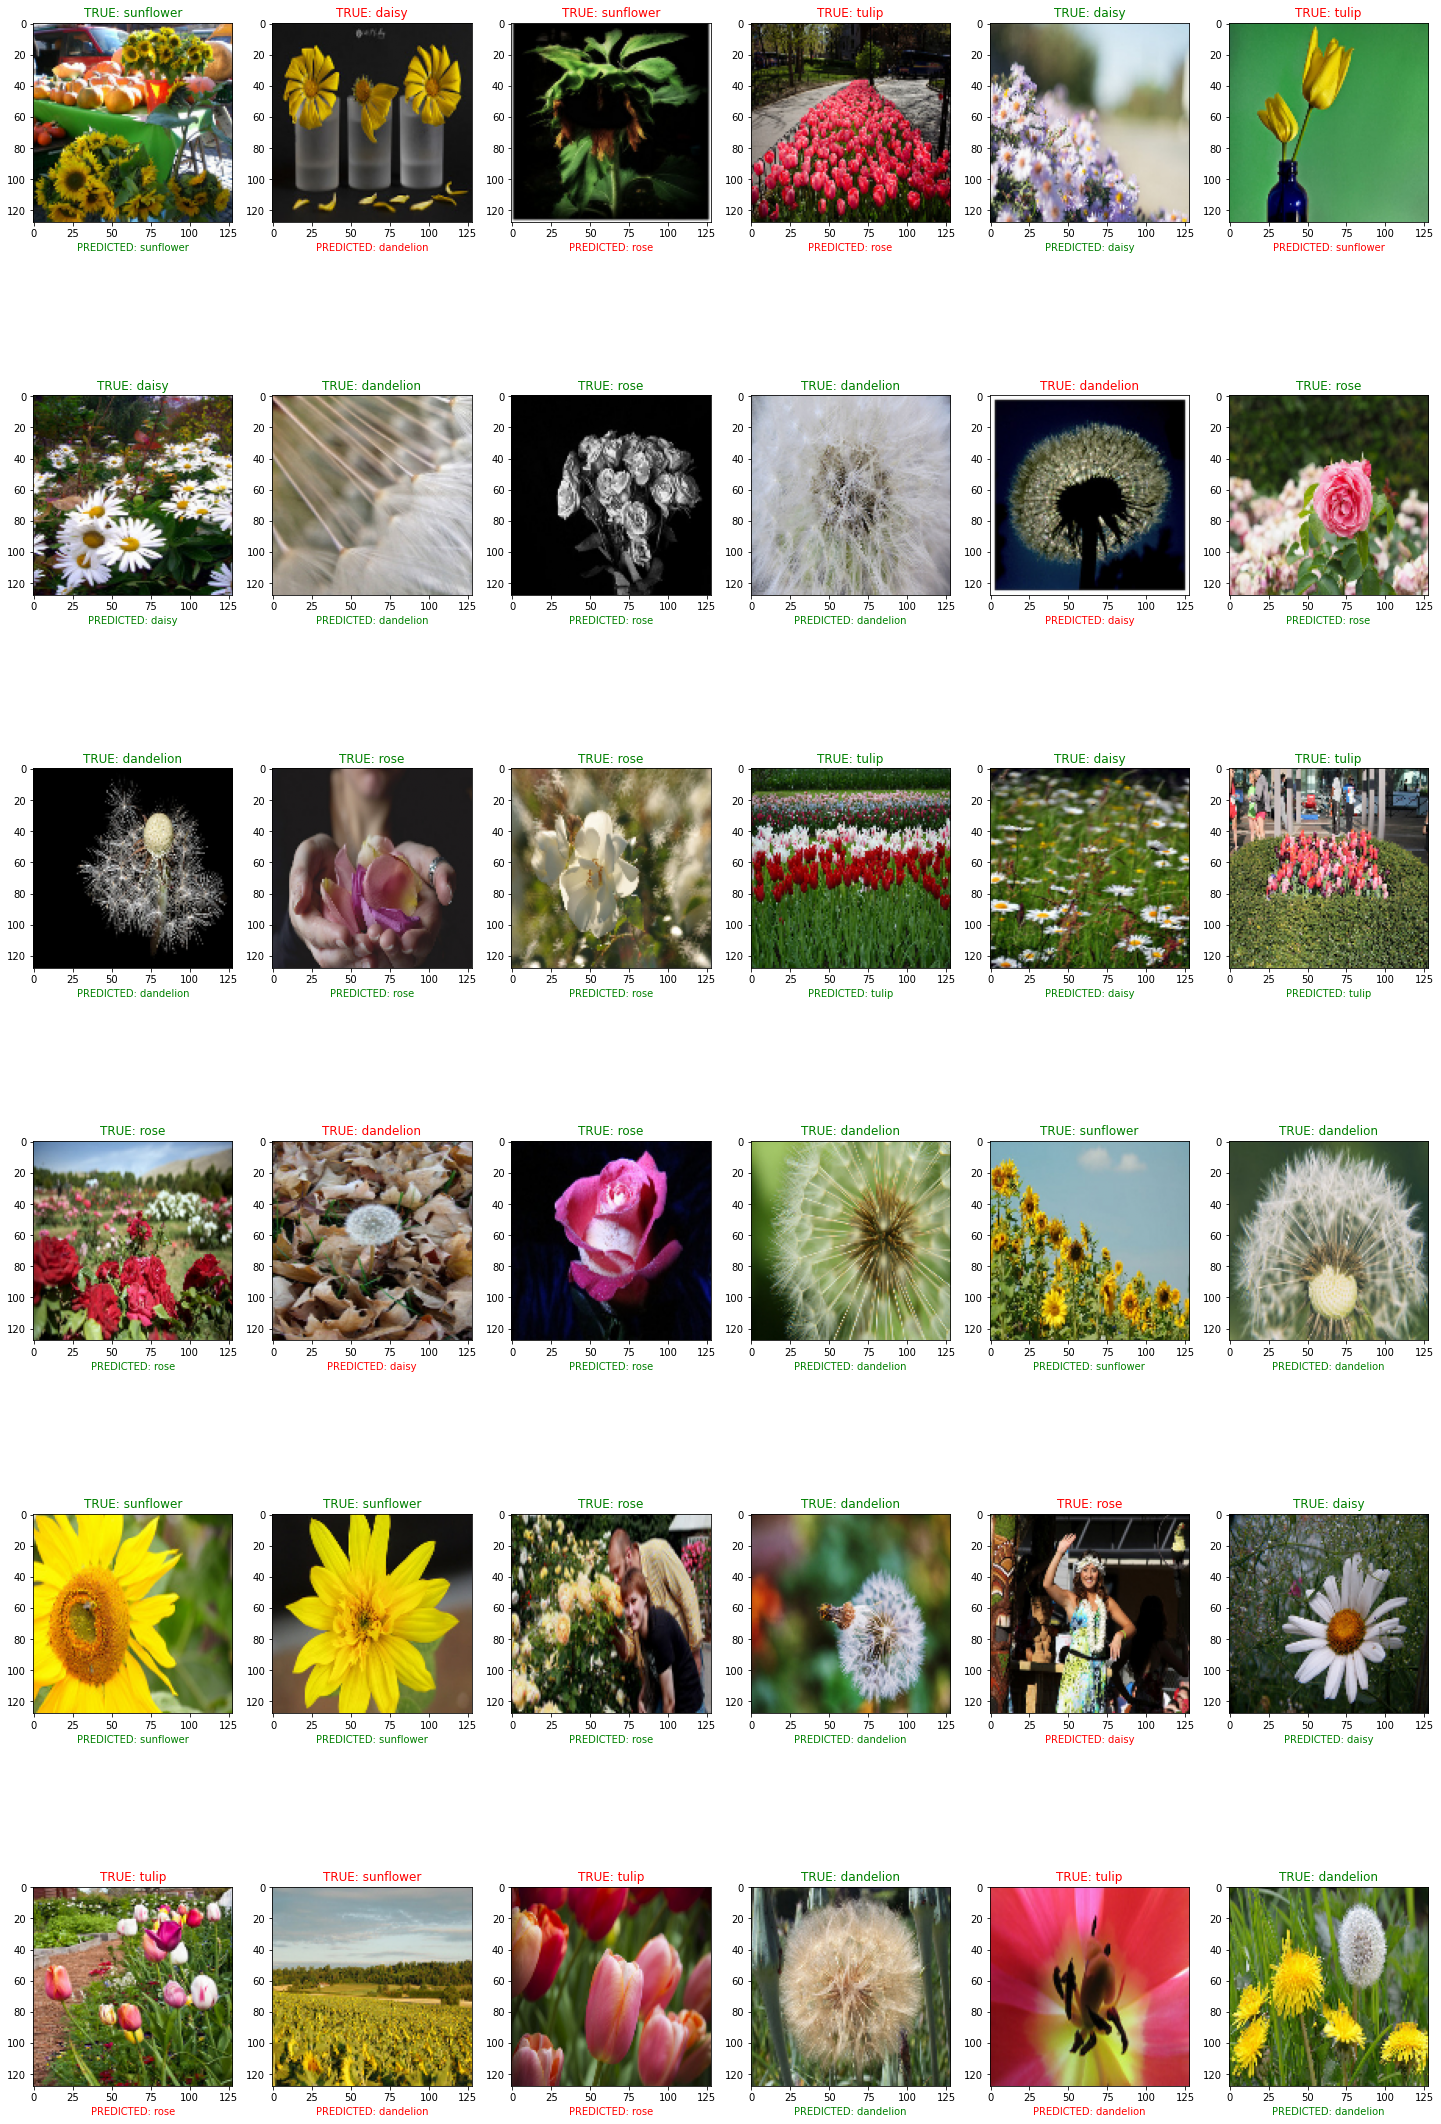

In [43]:
categories = np.sort(os.listdir(folder_dir))
fig , ax = plt.subplots(6,6,figsize=(25,40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')